# Patent Assignment Daily
Contains daily patent assignment text for 10/18/2016

## 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd

# 2) Loading datset

In [4]:
assignments = pd.read_csv('patent_assignment.csv', index_col= 0)

In [5]:
titles_in_data=assignments['title']

chars = list(set(titles_in_data)) 
data_size, vocab_size = len(titles_in_data), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 7530
Patent data has unique chars 6441


In [6]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

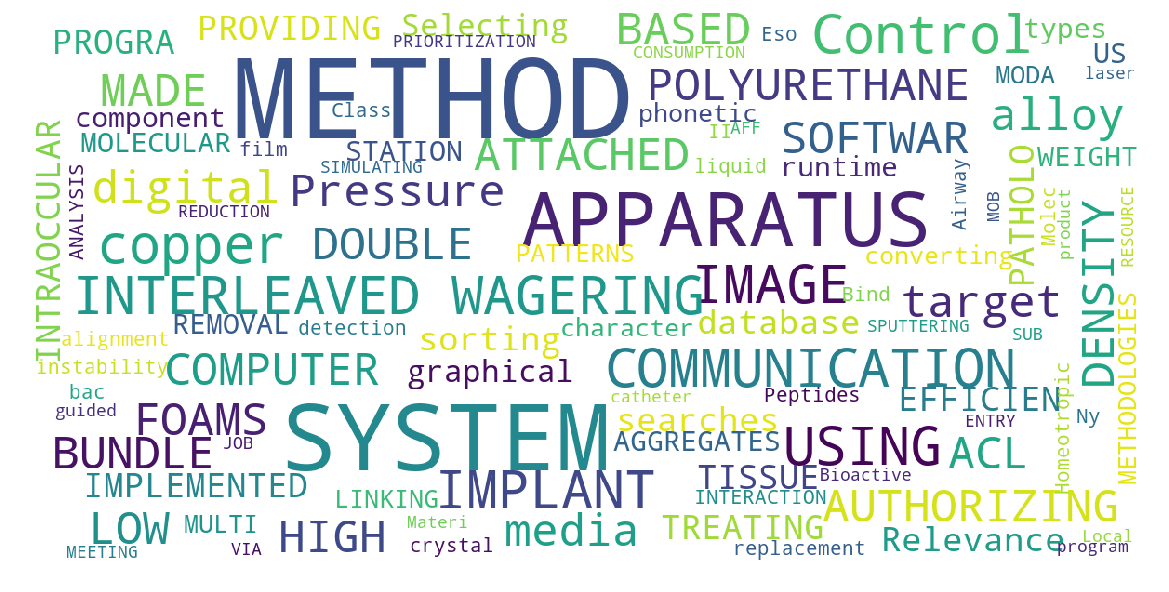

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(assignments['title'].dropna())

## 3) Cleaning and Preprocessing

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
type(titles_in_data)

pandas.core.series.Series

In [12]:
doc_complete=assignments['title'].astype(str)

In [13]:
type(doc_complete)

pandas.core.series.Series

In [14]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [17]:
df2 = pd.DataFrame({'Patent_titles':doc_clean})
df2.head()

,Patent_titles
0,"[relevance, sorting, database, search]"
1,"[method, treating, intraoccular, tissue, patho..."
2,"[method, apparatus, providing, efficient, cont..."
3,"[computerimplemented, method, system, program,..."
4,"[selecting, graphical, component, type, runtime]"


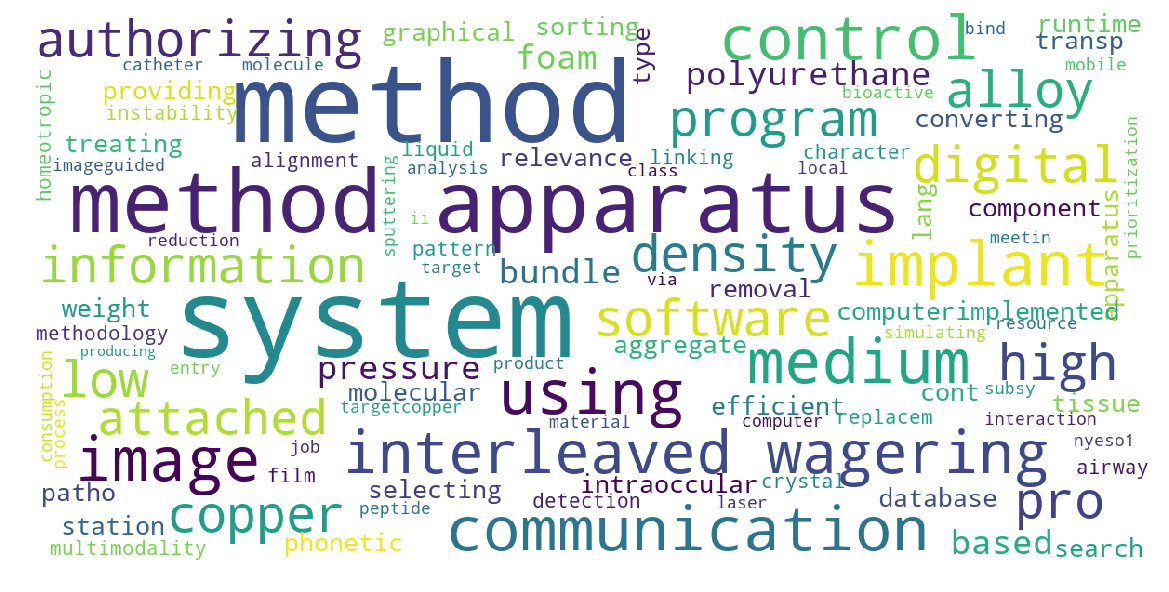

In [19]:
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df2["Patent_titles"].dropna())

### Count word frequencies

In [20]:
from collections import defaultdict
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [22]:
# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in doc_clean]

# 4) Preparing Document-Term Matrix


In [23]:
import gensim
from gensim import corpora

In [24]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 

dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# 5) LDA Model

In [25]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [26]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

# 6) Results

In [27]:
ldamodel.print_topics(num_topics=5, num_words=5)

[(0,
  '0.025*"method" + 0.019*"system" + 0.012*"apparatus" + 0.011*"data" + 0.011*"using"'),
 (1,
  '0.033*"method" + 0.028*"system" + 0.018*"data" + 0.016*"storage" + 0.015*"drive"'),
 (2,
  '0.024*"method" + 0.016*"system" + 0.007*"device" + 0.006*"composition" + 0.006*"assembly"'),
 (3,
  '0.035*"method" + 0.026*"device" + 0.021*"apparatus" + 0.015*"communication" + 0.014*"system"'),
 (4,
  '0.039*"method" + 0.028*"device" + 0.024*"memory" + 0.018*"circuit" + 0.017*"semiconductor"')]